# Word Frequency Analysis In Reviews By Beer Type

In [35]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.
%matplotlib inline
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
import nltk
import numpy

## For feature extraction, bag of words
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
def main():
    ## Put stuff in notebook here
    print "main!"

In [3]:
#In Python: Define a database name (we're using a dataset on births, so I call it 
# birth_db), and your username for your computer (CHANGE IT BELOW). 
dbname = 'beer_db_2'
username = 'postgres'
mypassword = 'simple'
engine = create_engine('postgres://%s:%s@localhost/%s'%(username,mypassword,dbname))

con = psycopg2.connect(database = dbname, user = username,host='/var/run/postgresql',password=mypassword)

## Queries and results

In [15]:
beer_style_query = '''
SELECT
    breweries.style_name,count(distinct breweries.beer_name) as number_of_beers
FROM
    breweries
WHERE
    breweries.city = 'San Diego'
GROUP BY
    breweries.style_name
ORDER BY
    number_of_beers desc;
'''
beer_style_rank = pd.read_sql_query(beer_style_query,con)

beer_reviews_query = '''
SELECT
    reviews.review_text,
    reviews.beer_key,
    reviews.username,
    reviews.look,
    reviews.taste,
    reviews.feel,
    reviews.overall,
    breweries.style_key,
    breweries.style_name
FROM 
    reviews,breweries
WHERE
    breweries.beer_name_key = reviews.beer_key
AND 
    breweries.city = 'San Diego'
ORDER BY
    reviews.username
'''
beer_reviews = pd.read_sql_query(beer_reviews_query,con)

ratings_per_user_query = '''
SELECT
    reviews.username,count(reviews.review_text) as number_of_reviews
FROM 
    reviews,breweries
WHERE
    reviews.beer_key = breweries.beer_name_key
AND
    breweries.city = 'San Diego'
GROUP BY
    reviews.username
ORDER BY 
    number_of_reviews desc;
'''

user_ratings = pd.read_sql_query(ratings_per_user_query,con)

# IPA, Double IPA, English IPA
ipa_query = """
SELECT
    reviews.username,
    reviews.review_text,
    reviews.beer_key,
    breweries.brewery_key,
    breweries.beer_name,
    reviews.look,
    reviews.taste,
    reviews.feel,
    reviews.overall,
    breweries.style_key,
    breweries.style_name
FROM 
    reviews,breweries
WHERE
    breweries.beer_name_key = reviews.beer_key
AND breweries.ratings_count > 20
AND 
( 
 breweries.style_key = 116
 OR breweries.style_key = 140
 OR breweries.style_key = 150
)
ORDER BY
    breweries.avg_score desc;
"""

# american porter, english porter, oatmeal stout, milk/sweet stout
not_ipa_query = """
SELECT
    reviews.username,
    reviews.review_text,
    reviews.beer_key,
    breweries.brewery_key,
    breweries.beer_name,
    reviews.look,
    reviews.taste,
    reviews.feel,
    reviews.overall,
    breweries.style_key,
    breweries.style_name
FROM 
    reviews,breweries
WHERE
    breweries.beer_name_key = reviews.beer_key
AND breweries.ratings_count > 20
AND 
(
 breweries.style_key = 159
 OR breweries.style_key = 101
 OR breweries.style_key = 67
 OR breweries.style_key = 82
)
ORDER BY
    reviews.overall desc;
"""

ipa = pd.read_sql_query(ipa_query,con)
not_ipa = pd.read_sql_query(not_ipa_query,con)

In [16]:
ipa

,username,review_text,beer_key,brewery_key,beer_name,look,taste,feel,overall,style_key,style_name
0,Gerad_12,stood line back february samuel hornes folsom ...,21690,863,Pliny The Younger,4.75,5.00,4.75,5.00,140,American Double / Imperial IPA
1,garrycamden,it rare find brew sum word pliny younger beer ...,21690,863,Pliny The Younger,5.00,5.00,5.00,5.00,140,American Double / Imperial IPA
2,Biggtriksta,had tap brewery last year two week release it ...,21690,863,Pliny The Younger,4.25,5.00,4.25,5.00,140,American Double / Imperial IPA
3,paint94979,i ve younger rrbc both years great the malt pr...,21690,863,Pliny The Younger,5.00,5.00,5.00,5.00,140,American Double / Imperial IPA
4,hoho2701,this unbelievable perfectly crafted double ipa...,21690,863,Pliny The Younger,4.75,5.00,4.50,5.00,140,American Double / Imperial IPA
5,luisitoelmatador88,i feel like irresponsible goober ever reviewed...,21690,863,Pliny The Younger,5.00,5.00,5.00,5.00,140,American Double / Imperial IPA
6,HBPierside,terrific triple ipa waited line hours able get...,21690,863,Pliny The Younger,4.75,5.00,5.00,5.00,140,American Double / Imperial IPA
7,K4550,went tapping south philly taproom philadelphia...,21690,863,Pliny The Younger,4.00,4.75,4.50,4.50,140,American Double / Imperial IPA
8,DoubleSimcoe,pliny younger tap monk cafe philadelphia fifte...,21690,863,Pliny The Younger,3.75,3.75,3.25,4.25,140,American Double / Imperial IPA
9,beatenbyjacks,if lines around beer i would like even there a...,21690,863,Pliny The Younger,4.50,4.50,4.25,4.50,140,American Double / Imperial IPA


In [17]:
not_ipa

,username,review_text,beer_key,brewery_key,beer_name,look,taste,feel,overall,style_key,style_name
0,hikanteki,very intense deep brown nearly black served oz...,140458,32931,Imperial Coffee And Cigarettes,5.00,5.00,5.00,5.00,159,American Porter
1,ohjay,bought local bevmo brea ca they stock you defi...,64638,16843,Immelmann Bourbon Barrel Aged Porter (Barrel R...,4.00,5.00,4.50,5.00,159,American Porter
2,MiScusi,consumed growler days filling looks like porte...,55431,3120,Token,4.50,5.00,4.50,5.00,159,American Porter
3,JoLight,appearance brown hues around corners black bod...,90,147,Stone Smoked Porter,5.00,5.00,5.00,5.00,159,American Porter
4,Wontonst,i m usually impressed u s beers well beer give...,108500,32931,Coffee And Cigarettes,4.75,4.75,5.00,5.00,159,American Porter
5,Mark,nice deep black color tan head lasted as seems...,15556,463,Cole Porter,4.00,4.00,4.00,5.00,159,American Porter
6,Grnmnstr,absolutely one the best porters i ve i m east ...,30588,13065,Stock Porter,5.00,5.00,5.00,5.00,159,American Porter
7,rambo10546,i restaurant point reys station bottle grocery...,4452,812,Point Reyes Porter,5.00,5.00,5.00,5.00,159,American Porter
8,boyntonliquors,this second season awesome beer speakeasy san ...,109917,559,Black Hand,5.00,5.00,5.00,5.00,82,Milk / Sweet Stout
9,Chcshammonde,sensational i little sad i couldn take home gr...,140458,32931,Imperial Coffee And Cigarettes,4.25,5.00,5.00,5.00,159,American Porter


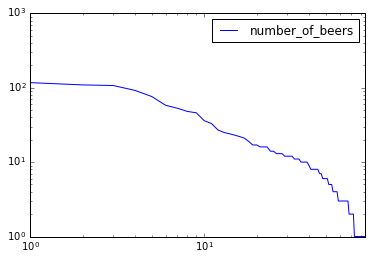

In [7]:
beer_style_rank.plot(logy=True,logx=True)

In [8]:
if __name__ == '__main__':
    main()

main!


In [9]:
beer_reviews

,review_text,beer_key,username,look,taste,feel,overall,style_key,style_name
0,dark brown body airy ipa like light brown head...,138387,1000lbgrizzly,3.75,3.50,3.75,3.75,158,American Stout
1,a dark brown body nut brown dense head that fa...,69792,1000lbgrizzly,4.50,4.00,4.00,4.25,95,Foreign / Export Stout
2,a clear yellow straw body with ample carbonati...,112877,1000lbgrizzly,4.25,3.50,3.75,3.50,85,Kölsch
3,on tap at iron press in anaheim ca pours a sli...,170793,2beerdogs,3.50,4.25,4.00,4.25,87,Berliner Weissbier
4,on tap at pie dog in fullerton burnished liqui...,116665,2beerdogs,3.75,4.00,3.75,3.75,157,American Double / Imperial Stout
5,picked up at hacienda beverage in brea ca grea...,159981,2beerdogs,3.50,4.00,3.75,3.75,129,Saison / Farmhouse Ale
6,pours a clear reddish copper with a half inch ...,104076,303beer,3.75,3.50,3.50,3.50,72,Pumpkin Ale
7,pours a blond copper color couple inches of he...,7284,303beer,4.00,3.75,3.75,4.25,140,American Double / Imperial IPA
8,a draft beer poured into a mug by bartender at...,45632,4DAloveofSTOUT,3.50,4.00,4.50,4.00,68,Scottish Ale
9,deep dark reddish copper mild hop nose the mou...,28312,57md,4.00,3.75,4.00,4.00,128,American Amber / Red Ale


## Generate Features From First 500 Reviews of Trainings Sets

In [73]:
ipa_reviews = []
ipa_words = {}
not_ipa_words = {}
for i in range (0,500):
    review = ipa.iloc[i]['review_text']
    ipa_reviews.append(review)
    words = review.split()
    #print words
    for word in words:
        if word not in ipa_words:
            ipa_words[word] = 1
        else:
            #print "found word!"
            ipa_words[word] += 1
not_ipa_reviews = []
for i in range(0,500):
    review = not_ipa.iloc[i]['review_text']
    not_ipa_reviews.append(review)
    words = review.split()
    for word in words:
        if word not in not_ipa_words:
            not_ipa_words[word] = 1
        else:
            not_ipa_words[word] += 1

    
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 
train_ipa_features_set = vectorizer.fit_transform(ipa_reviews)
train_not_ipa_features_set = vectorizer.fit_transform(not_ipa_reviews)

# to numpy array
train_ipa_features_set = train_ipa_features_set.toarray()
train_not_ipa_features_set = train_not_ipa_features_set.toarray()

print len(train_ipa_features_set)

500


In [85]:
for k,v in not_ipa_words.iteritems():
    if k in ipa_words:
        if (v > 175):
            print "IPA:",k,ipa_words[k],"NOT_IPA:",k,v

IPA: beer 484 NOT_IPA: beer 501
IPA: the 313 NOT_IPA: the 387
IPA: head 273 NOT_IPA: head 390
IPA: brown 5 NOT_IPA: brown 220
IPA: chocolate 1 NOT_IPA: chocolate 520
IPA: one 184 NOT_IPA: one 207
IPA: black 3 NOT_IPA: black 277
IPA: flavor 155 NOT_IPA: flavor 218
IPA: dark 14 NOT_IPA: dark 461
IPA: taste 269 NOT_IPA: taste 288
IPA: malt 199 NOT_IPA: malt 224
IPA: a 208 NOT_IPA: a 234
IPA: good 220 NOT_IPA: good 248
IPA: sweet 131 NOT_IPA: sweet 190
IPA: roasted 2 NOT_IPA: roasted 293
IPA: nice 194 NOT_IPA: nice 271
IPA: light 190 NOT_IPA: light 216
IPA: vanilla 1 NOT_IPA: vanilla 223
IPA: i 783 NOT_IPA: i 667
IPA: well 149 NOT_IPA: well 203
IPA: like 197 NOT_IPA: like 286
IPA: smooth 100 NOT_IPA: smooth 176
